In [1]:
#202209235汪洋
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_hastie_10_2
import matplotlib.pyplot as plt

In [2]:
data, target = make_hastie_10_2()
target.shape

(12000,)

In [3]:
data.shape

(12000, 10)

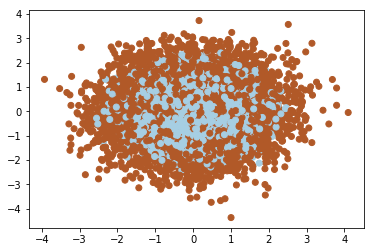

In [4]:
plt.scatter(data[:,-2],data[:,-1],c=target,cmap=plt.cm.Paired)
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2,random_state=33)
X_train.shape

(9600, 10)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import time

In [14]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = AdaBoostClassifier()
clf4 = svm.SVC(C=1.0, kernel='rbf', decision_function_shape='ovr',gamma=0.01)
clf5 = KNeighborsClassifier(n_neighbors=5)

for clf, label in zip([clf1,clf2,clf3,clf4,clf5],
                     ['LogisticRegression','RandomForest','AdaBoost','SVM','KNN']):
    start = time.time()
    scores = cross_val_score(clf,X_train,y_train,scoring='accuracy',cv=10)
    end = time.time()
    run_time = end -start
    print('Accuracy:%0.4f(+/-%0.2f),耗时%0.2f秒。模型名称：[%s]'%(scores.mean(),scores.std(),run_time,label))

Accuracy:0.4954(+/-0.02),耗时0.09秒。模型名称：[LogisticRegression]
Accuracy:0.8600(+/-0.01),耗时3.17秒。模型名称：[RandomForest]
Accuracy:0.8830(+/-0.01),耗时6.27秒。模型名称：[AdaBoost]
Accuracy:0.9753(+/-0.00),耗时9.03秒。模型名称：[SVM]
Accuracy:0.7196(+/-0.01),耗时1.42秒。模型名称：[KNN]
